<a href="https://colab.research.google.com/github/yunuserbas/WCS_Projet_2/blob/main/Projet__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')



In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
# Et maintenant nous pouvons afficher avec Pandas le résultat de n'importe quelle requête
# Par exemple :
geolocation_dataset_sql = pd.read_sql("select * from geolocation_dataset ", conn)
geolocation_dataset_sql

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
geolocation_dataset_sql.shape

(1000163, 5)

In [ ]:
geolocation_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_dataset_sql.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
customers_dataset_sql = pd.read_sql("select * from customers_dataset", conn)
customers_dataset_sql

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers_dataset_sql.shape

(99441, 5)

In [ ]:
customers_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_dataset_sql.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
product_category_name_translation_sql = pd.read_sql("select * from product_category_name_translation", conn)
product_category_name_translation_sql

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
product_category_name_translation_sql.shape

(71, 2)

In [ ]:
product_category_name_translation_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_name_translation_sql.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
sellers_dataset_sql = pd.read_sql("select * from sellers_dataset	", conn)
sellers_dataset_sql

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
sellers_dataset_sql.shape

(3095, 4)

In [ ]:
sellers_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_dataset_sql.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
products_dataset_sql = pd.read_sql("select * from products_dataset	", conn)
products_dataset_sql

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_dataset_sql.shape

(32951, 9)

In [ ]:
products_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_dataset_sql.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
orders_dataset_sql = pd.read_sql("select * from orders_dataset ", conn)
orders_dataset_sql

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders_dataset_sql.shape

(99441, 8)

In [ ]:
orders_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_dataset_sql.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order_reviews_dataset_sql = pd.read_sql("select * from order_reviews_dataset ", conn)
order_reviews_dataset_sql

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_reviews_dataset_sql.shape

(99224, 7)

In [ ]:
order_reviews_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11566 non-null  object
 4   review_comment_message   40950 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_dataset_sql.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87658
review_comment_message     58274
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
order_payments_dataset_sql = pd.read_sql("select * from order_payments_dataset ", conn)
order_payments_dataset_sql

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_payments_dataset_sql.shape

(103886, 5)

In [ ]:
order_payments_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_dataset_sql.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
order_items_dataset_sql = pd.read_sql("select * from order_items_dataset	", conn)
order_items_dataset_sql

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items_dataset_sql.shape

(112650, 7)

In [ ]:
order_items_dataset_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_dataset_sql.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

# Semaine 2 : Organisation ("tables intermédiaires")

Avant de répondre à la demande du PDG d'Olist, nous devons rechercher les causes d'un mauvais `review_score`.

Une bonne pratique pour ce genre de problème est de construire plusieurs tables intermédiaires, chacune contenant un unique_id et les informations pertinentes pour cette table.  

Par exemple :

* table des commandes (id, review_score, montant, distance entre le vendeur et le client...)
* table des vendeurs (id, note moyenne par vendeur, temps d'attente moyen, ...)
* table des produits : (id, score moyen d'avis, catégories, couleurs, tailles...)
* table des clients (id, quelques propriétés de ce client)
* table des avis (id, texte traduit, propriétés de ce texte...)

Une fois que tu sera satisfait de tes tables intermédiaires imaginés, tu pourras dans un premier temps exporter les tables de données .sql en fichier .csv, avant de les créer avec le langage Pandas. Tu fera ensuite ton analyse en te servant de ces tables intermédiaires.





# Idées tables intermédiaires


Dans un premier temps, réfléchis avec ton groupe en observant le schéma de la base de données que tu as fait plus haut. Quelles sont les tables intermédiaires à créer pour proposer une analyse consise et pertinente en s'appuyant sur ses dernières ?
Vous pouvez, individuellement ou en groupe, réfléchir à ses tables intermédiaires.
Lundi matin, nous échangerons tous ensemble sur vos idées de tables intermédiaires.


In [ ]:
df_seller_reviews = pd.merge(order_reviews_dataset_sql, order_items_dataset_sql, how= 'left', on='order_id')
df_seller_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                113131 non-null  object 
 1   order_id                 113131 non-null  object 
 2   review_score             113131 non-null  int64  
 3   review_comment_title     13521 non-null   object 
 4   review_comment_message   48138 non-null   object 
 5   review_creation_date     113131 non-null  object 
 6   review_answer_timestamp  113131 non-null  object 
 7   order_item_id            112372 non-null  float64
 8   product_id               112372 non-null  object 
 9   seller_id                112372 non-null  object 
 10  shipping_limit_date      112372 non-null  object 
 11  price                    112372 non-null  float64
 12  freight_value            112372 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 12.1+ MB


In [ ]:
df_seller_reviews['review_score'].loc[df_seller_reviews['review_score'] <= 3].sum()

51075

In [ ]:
corr = df_seller_reviews.corr(method='pearson')
corr

,review_score,order_item_id,price,freight_value
review_score,1.000000,-0.130890,-0.003941,-0.036179
order_item_id,-0.130890,1.000000,-0.061140,-0.029214
price,-0.003941,-0.061140,1.000000,0.412707
freight_value,-0.036179,-0.029214,0.412707,1.000000


#Question 6

**Les livraisons effectuées en retard sont-elles moins bien notées ?**

In [ ]:
tbd = pd.merge(orders_dataset_sql, order_reviews_dataset_sql, how='inner')
tbd

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,None,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,None,None,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,None,None,2017-03-22 00:00:00,2017-03-23 11:02:08
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,None,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [ ]:
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99224 non-null  object
 1   customer_id                    99224 non-null  object
 2   order_status                   99224 non-null  object
 3   order_purchase_timestamp       99224 non-null  object
 4   order_approved_at              99068 non-null  object
 5   order_delivered_carrier_date   97468 non-null  object
 6   order_delivered_customer_date  96359 non-null  object
 7   order_estimated_delivery_date  99224 non-null  object
 8   review_id                      99224 non-null  object
 9   review_score                   99224 non-null  int64 
 10  review_comment_title           11566 non-null  object
 11  review_comment_message         40950 non-null  object
 12  review_creation_date           99224 non-null  object
 13  r

In [ ]:
tbd['order_estimated_delivery_date'] = pd.to_datetime(tbd['order_estimated_delivery_date'])
tbd['order_delivered_customer_date'] = pd.to_datetime(tbd['order_delivered_customer_date'])
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99224 non-null  object        
 1   customer_id                    99224 non-null  object        
 2   order_status                   99224 non-null  object        
 3   order_purchase_timestamp       99224 non-null  object        
 4   order_approved_at              99068 non-null  object        
 5   order_delivered_carrier_date   97468 non-null  object        
 6   order_delivered_customer_date  96359 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99224 non-null  datetime64[ns]
 8   review_id                      99224 non-null  object        
 9   review_score                   99224 non-null  int64         
 10  review_comment_title           11566 non-null  object        
 11  review_comment_

In [ ]:
orders_delivered_late = tbd.loc[tbd['order_delivered_customer_date'] > tbd['order_estimated_delivery_date']]
orders_delivered_late

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20 00:00:00,2018-03-23 22:56:05
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18 00:00:00,2018-08-18 17:13:46
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04 00:00:00,2018-04-04 10:15:42
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03


In [ ]:
review_validated = orders_delivered_late.loc[orders_delivered_late['order_estimated_delivery_date'] < orders_delivered_late['review_answer_timestamp']]
review_validated

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20 00:00:00,2018-03-23 22:56:05
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18 00:00:00,2018-08-18 17:13:46
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04 00:00:00,2018-04-04 10:15:42
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03


In [ ]:
from datetime import date

delta =  tbd['order_estimated_delivery_date'] - tbd['order_delivered_customer_date']
tbd['delta'] = delta.dt.days
tbd[['delta']]
#d1 = tbd['order_delivered_customer_date']
#delta = d0 - d1
#print('The number of days between the given range of dates is :')
#print(delta.dt.days)

,delta
0,7.0
1,5.0
2,17.0
3,12.0
4,9.0
...,...
99219,10.0
99220,1.0
99221,5.0
99222,20.0


In [ ]:
delivered_late = tbd.loc[tbd['delta'] < 0]
delivered_late

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,-12.0
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58,-10.0
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20 00:00:00,2018-03-23 22:56:05,-1.0
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32,-8.0
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18 00:00:00,2018-08-18 17:13:46,-6.0
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04 00:00:00,2018-04-04 10:15:42,-4.0
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,-22.0
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03,-3.0


In [ ]:
delivery_late = delivered_late.loc[delivered_late['order_estimated_delivery_date'] < delivered_late['review_answer_timestamp']]
delivery_late 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,-12.0
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58,-10.0
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20 00:00:00,2018-03-23 22:56:05,-1.0
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22 00:00:00,2017-12-28 11:25:32,-8.0
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04 00:00:00,2018-04-04 09:31:50,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18 00:00:00,2018-08-18 17:13:46,-6.0
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04 00:00:00,2018-04-04 10:15:42,-4.0
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,-22.0
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03,-3.0


In [ ]:
delivery_late['review_score'].value_counts()

1    3541
5    1687
4     940
3     866
2     601
Name: review_score, dtype: int64

In [ ]:
delivered_late['review_score'].value_counts()

1    3554
5    1711
4     954
3     876
2     606
Name: review_score, dtype: int64

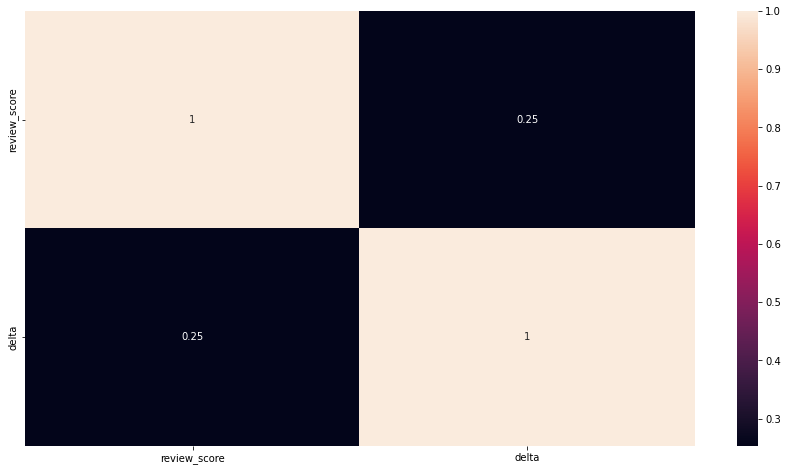

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_matrix = delivery_late.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=True)

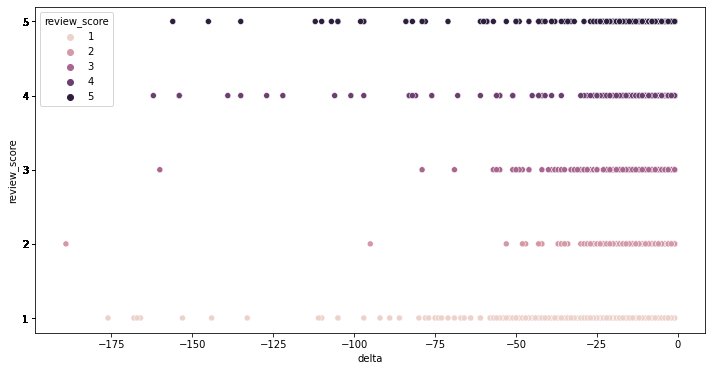

In [ ]:
plt.subplots(figsize = (12,6))
sns.scatterplot(data= delivery_late , x="delta", y=delivery_late["review_score"], hue="review_score")
plt.yticks(delivery_late["review_score"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


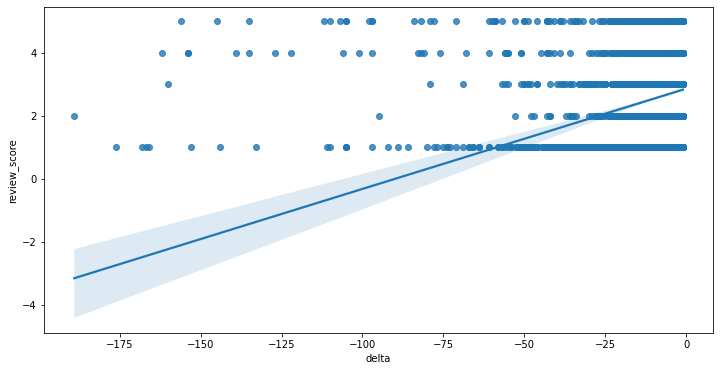

In [ ]:
plt.subplots(figsize = (12,6))
sns.regplot("delta", "review_score", data = delivery_late)
plt.show()

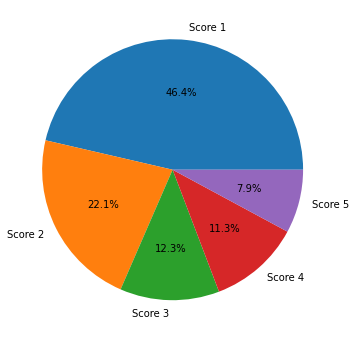

In [ ]:
plt.subplots(figsize = (12,6))
percentage = delivery_late['review_score'].value_counts(normalize=True)*100
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage, labels=opinion, autopct='%1.1f%%')
plt.show()

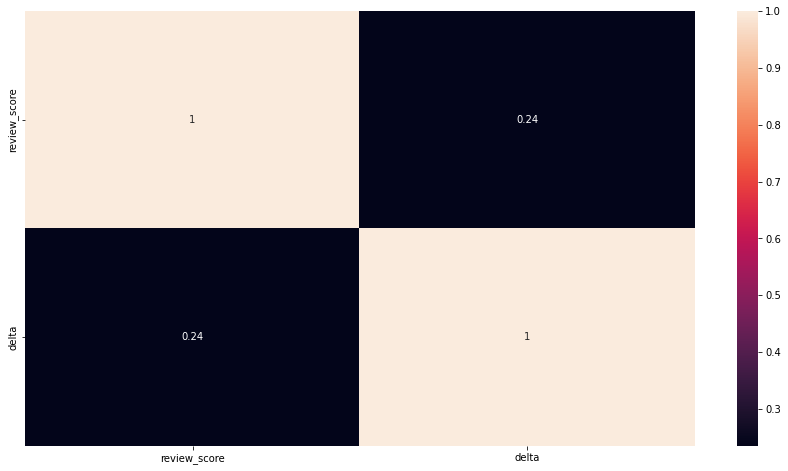

In [ ]:
#review_validated

cor_matrix = delivered_late.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=True)

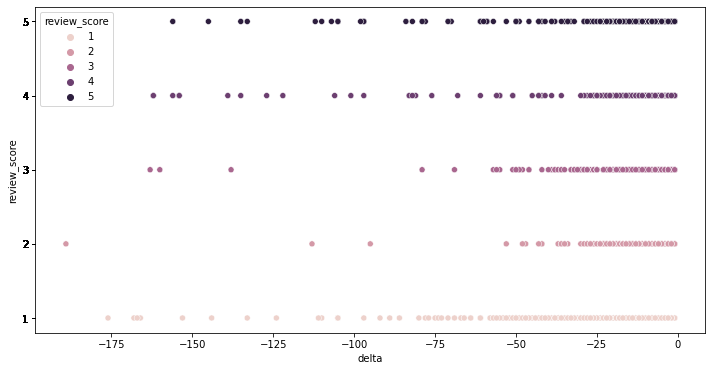

In [ ]:
plt.subplots(figsize = (12,6))
sns.scatterplot(data= delivered_late , x="delta", y=delivered_late["review_score"], hue="review_score")
plt.yticks(delivered_late["review_score"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


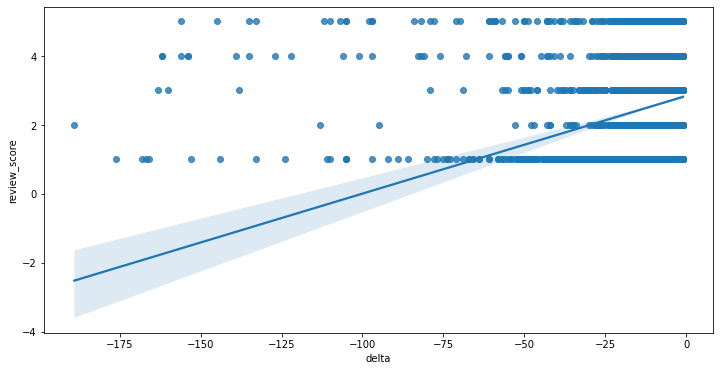

In [ ]:
plt.subplots(figsize = (12,6))
sns.regplot("delta", "review_score", data = delivered_late)
plt.show()

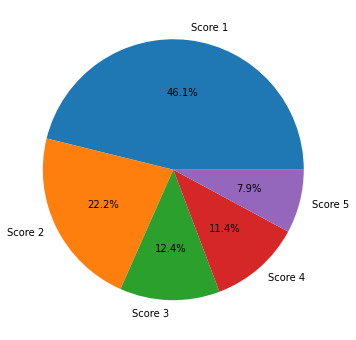

In [ ]:
plt.subplots(figsize = (12,6))
percentage = delivered_late['review_score'].value_counts(normalize=True)*100
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage, labels=opinion, autopct='%1.1f%%')
plt.show()

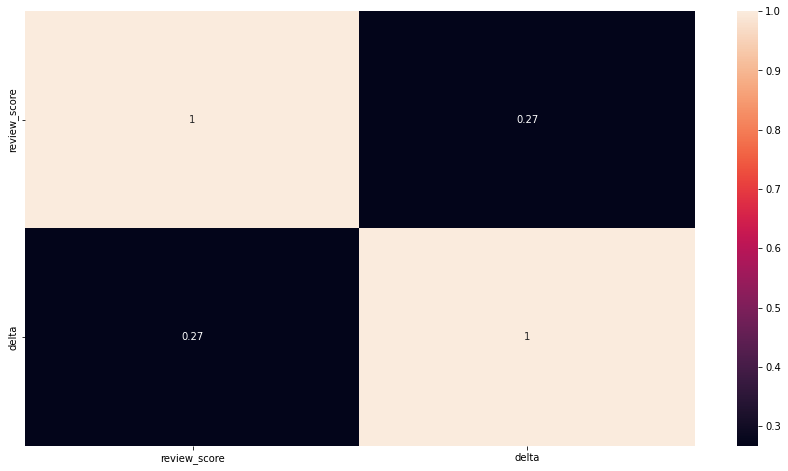

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#review_validated

cor_matrix = tbd.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


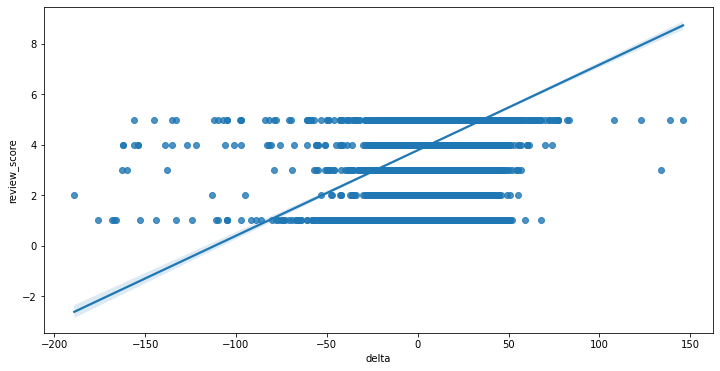

In [ ]:
plt.subplots(figsize = (12,6))
sns.regplot("delta", "review_score", data = tbd)
plt.show()

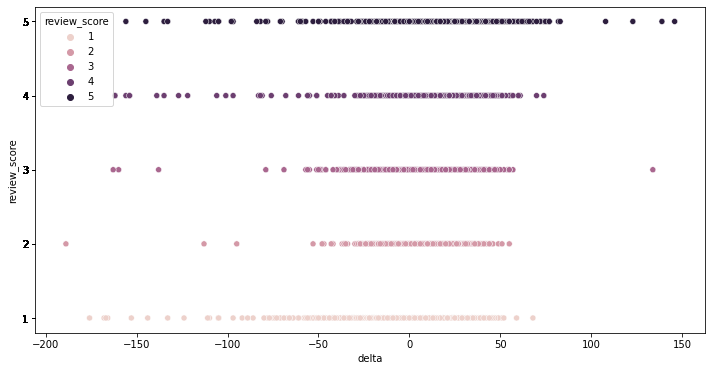

In [ ]:
plt.subplots(figsize = (12,6))
sns.scatterplot(data= tbd , x="delta", y=tbd["review_score"], hue="review_score")
plt.yticks(tbd["review_score"])
plt.show()

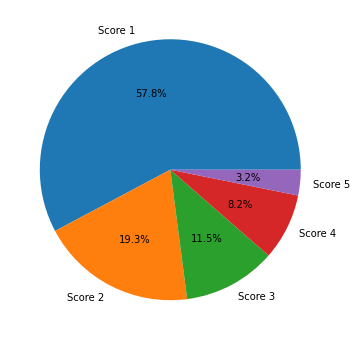

In [ ]:
plt.subplots(figsize = (12,6))
percentage = tbd['review_score'].value_counts(normalize=True)*100
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage, labels=opinion, autopct='%1.1f%%')
plt.show()

In [ ]:
delivery_on_time = tbd.loc[tbd['delta'] >= 0]
delivery_on_time

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,None,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,None,None,2018-02-17 00:00:00,2018-02-18 13:02:51,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5,None,None,2017-03-22 00:00:00,2017-03-23 11:02:08,10.0
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1.0
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5,None,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,5.0
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,20.0


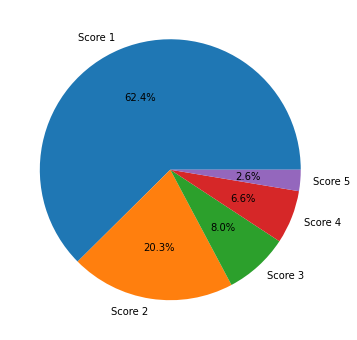

In [ ]:
plt.subplots(figsize = (12,6))
percentage = delivery_on_time['review_score'].value_counts(normalize=True)*100
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage, labels=opinion, autopct='%1.1f%%')
plt.show()

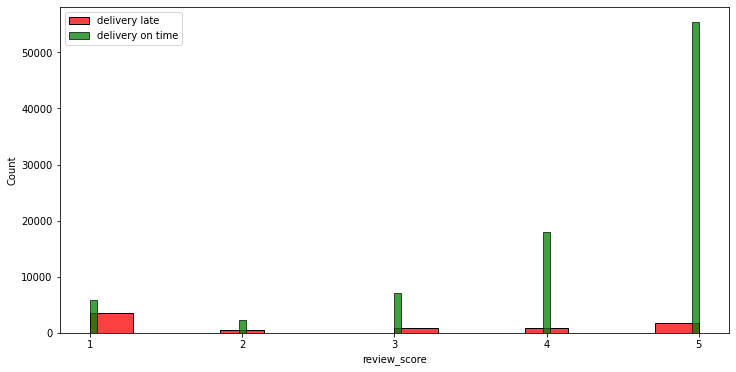

In [ ]:
plt.subplots(figsize = (12,6))

sns.histplot(delivery_late, x='review_score', color='red', label= "delivery late")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

sns.histplot(delivery_on_time, x='review_score', color='green', label="delivery on time")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()